# 4. 파이토치 기본
## 4.2 역전파 - 선형회귀식

In [ ]:
import torch
from matplotlib import pyplot as plt

In [13]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]
print(x)
print(y)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.8993],
        [2.6746],
        [4.6778],
        [6.8891],
        [8.9825]])


In [14]:
print(x.shape, y.shape)

torch.Size([5, 1]) torch.Size([5, 1])


In [15]:
#dtype = torch.FloatTensor
#W = Variable(torch.randn(num_features, 1), requires_grad=True)
#b = Variable(torch.randn(1), requires_grad=True)
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [16]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [17]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [18]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()
    
    y_hat = torch.matmul(x, w) + b
    loss = torch.mean((y_hat-y)**2)
    
    loss.backward()
    optimizer.step() 
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:53.02552032470703
Epoch 100:3.6888680458068848
Epoch 200:0.3567788004875183
Epoch 300:0.12169404327869415
Epoch 400:0.09622804820537567
Epoch 500:0.08595291525125504
Epoch 600:0.07766362279653549
Epoch 700:0.07036308944225311
Epoch 800:0.06388819962739944
Epoch 900:0.058142293244600296
Epoch 1000:0.053043145686388016


In [19]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

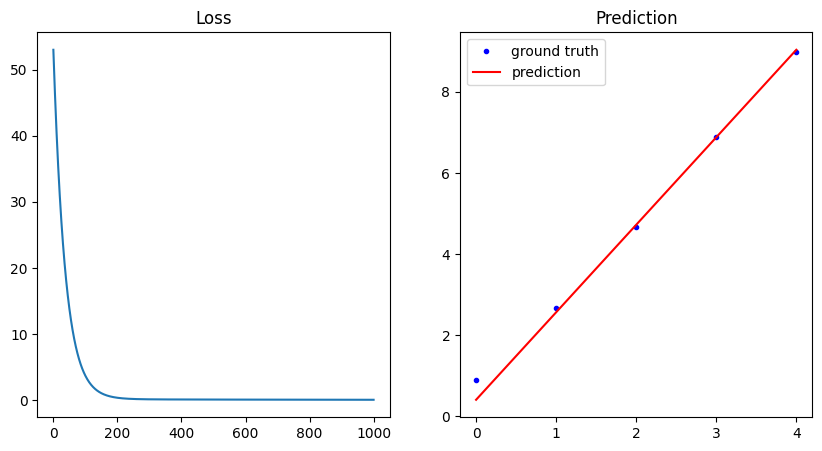

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()